##Psi Heatmaps for Modern Data


This notebook will take the psi output table from Benjamin Peters' Range Expansion R package and make a heatmap. 

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams['pdf.fonttype'] = 42
import numpy as np
import pandas as pd 
import palettable as pal
# Enable inline plotting
%matplotlib inline

In [2]:
#Here, you can define your and the populations (in correct order) file upfront! 
filepath = '/Users/eleanorbors/Desktop/Analysis/directionality_index/psi_b9_p8_r80.txt'

#Pop list for modern = 
Populations = ['Florida', 'Bahamas', 'Dominican','Jamaica','USVI','Caymans','Mexico','Belize','Honduras']

In [3]:
df = pd.read_csv(filepath, sep='\t', header = False)
df.columns = Populations
df.index= Populations

print df

            Florida   Bahamas  Dominican   Jamaica      USVI   Caymans  \
Florida    0.000000  0.057010   0.070429  0.059285  0.047898  0.044720   
Bahamas   -0.057010  0.000000   0.013996  0.000238 -0.012204 -0.011181   
Dominican -0.070429 -0.013996   0.000000 -0.012693 -0.025824 -0.025253   
Jamaica   -0.059285 -0.000238   0.012693  0.000000 -0.011993 -0.012764   
USVI      -0.047898  0.012204   0.025824  0.011993  0.000000 -0.000424   
Caymans   -0.044720  0.011181   0.025253  0.012764  0.000424  0.000000   
Mexico    -0.060103  0.000971   0.013380  0.001204 -0.011930 -0.012536   
Belize    -0.063642 -0.008271   0.005520 -0.006795 -0.020515 -0.018860   
Honduras  -0.039713  0.009701   0.026669  0.016185  0.000217 -0.000213   

             Mexico    Belize  Honduras  
Florida    0.060103  0.063642  0.039713  
Bahamas   -0.000971  0.008271 -0.009701  
Dominican -0.013380 -0.005520 -0.026669  
Jamaica   -0.001204  0.006795 -0.016185  
USVI       0.011930  0.020515 -0.000217  
Caymans

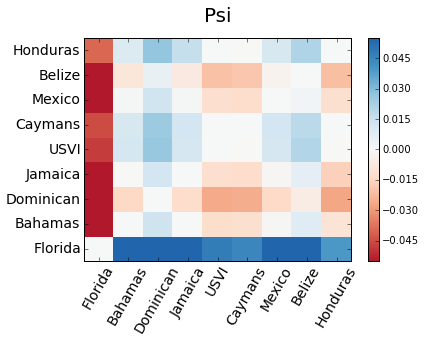

In [4]:

from palettable.colorbrewer.diverging import RdBu_9

plt.pcolor(df, cmap=RdBu_9.mpl_colormap, vmin=-0.055, vmax=0.055)

plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize = 14)

plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=60, fontsize = 14)

plt.colorbar()

plt.title("Psi", fontsize = 20, y = 1.05)
plt.savefig('/Users/eleanorbors/Desktop/Analysis/directionality_index/figures/Psi_Modern_PE_SE.pdf', bbox_inches='tight', format='pdf')


plt.show()



##Order the figure by directionality index


In [5]:
#BY HAND, find the "closest to middle" and order the cells. 
ordered_df = df.sort(["Florida"], ascending=False)

print ordered_df


#Manually enter the order of the countries here based on the first sort 
#For the lionfish dataset, it's this: 
sorted_ordered_df = ordered_df[['Florida', 'Honduras', 'Caymans', 'USVI', 'Bahamas', 'Jamaica', 'Mexico', 'Belize', 'Dominican']]
sorted_ordered_df = sorted_ordered_df.reindex(['Florida', 'Honduras', 'Caymans', 'USVI', 'Bahamas', 'Jamaica', 'Mexico', 'Belize', 'Dominican'])
print sorted_ordered_df

            Florida   Bahamas  Dominican   Jamaica      USVI   Caymans  \
Florida    0.000000  0.057010   0.070429  0.059285  0.047898  0.044720   
Honduras  -0.039713  0.009701   0.026669  0.016185  0.000217 -0.000213   
Caymans   -0.044720  0.011181   0.025253  0.012764  0.000424  0.000000   
USVI      -0.047898  0.012204   0.025824  0.011993  0.000000 -0.000424   
Bahamas   -0.057010  0.000000   0.013996  0.000238 -0.012204 -0.011181   
Jamaica   -0.059285 -0.000238   0.012693  0.000000 -0.011993 -0.012764   
Mexico    -0.060103  0.000971   0.013380  0.001204 -0.011930 -0.012536   
Belize    -0.063642 -0.008271   0.005520 -0.006795 -0.020515 -0.018860   
Dominican -0.070429 -0.013996   0.000000 -0.012693 -0.025824 -0.025253   

             Mexico    Belize  Honduras  
Florida    0.060103  0.063642  0.039713  
Honduras   0.011542  0.020707  0.000000  
Caymans    0.012536  0.018860  0.000213  
USVI       0.011930  0.020515 -0.000217  
Bahamas   -0.000971  0.008271 -0.009701  
Jamaica

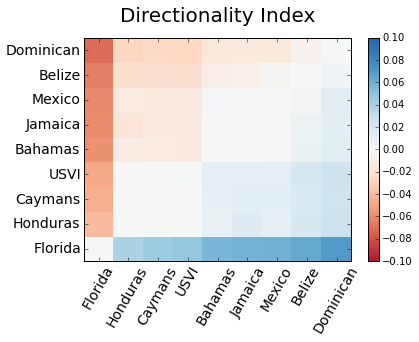

In [8]:
from palettable.colorbrewer.diverging import RdBu_9

plt.pcolor(sorted_ordered_df, cmap=RdBu_9.mpl_colormap, vmin=-0.1, vmax=0.1)

#Change the columns sources so the order is correct!!! 

plt.yticks(np.arange(0.5, len(sorted_ordered_df.index), 1), sorted_ordered_df.index, fontsize=14)

plt.xticks(np.arange(0.5, len(sorted_ordered_df.columns), 1), sorted_ordered_df.columns, rotation=60, fontsize = 14)

plt.colorbar()
plt.title("Directionality Index", fontsize = 20, y = 1.05)
#plt.savefig('ordered_historic_42bp_psi.png')
#plt.savefig('ordered_modern_SE_PE.png')
plt.savefig('/Users/eleanorbors/Desktop/Analysis/directionality_index/figures/ordered_b9_p8_r80.pdf', bbox_inches='tight', format='pdf', dpi=1000)

plt.show()